In [27]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold
from sklearn.neural_network import MLPRegressor
import numpy as np
from sklearn.metrics import make_scorer
from scipy.stats import randint

In [28]:
dataset = loadtxt("data/cup/ML-CUP23-TR.csv", delimiter=',', usecols=range(1, 14), dtype=np.float64)
print(dataset[0]) # check the correctness
      

# Build training set
x = dataset[:, :-3]
y = dataset[:, -3:]

# Set the seed for reproducibility
np.random.seed(42)

# Define the proportions for train, validation, and test sets
train_percent = 0.8
val_percent = 0.1
test_percent = 0.1

# Calculate the number of samples for each set
num_samples = len(dataset)
num_train = int(train_percent * num_samples)
num_val = int(val_percent * num_samples)
num_test = int(test_percent * num_samples)

# Shuffle the indices
indices = np.arange(num_samples)
np.random.shuffle(indices)

# Split the indices into train, validation, and test sets
train_indices = indices[:num_train]
val_indices = indices[num_train:num_train + num_val]
test_indices = indices[num_train + num_val:]

# Use the indices to get the corresponding data for each set
x_train, y_train = x[train_indices], y[train_indices]
x_val, y_val = x[val_indices], y[val_indices]
x_test, y_test = x[test_indices], y[test_indices]

# Print the sizes of the resulting sets
print("Train set size:", len(x_train))
print("Validation set size:", len(x_val))
print("Internal Test set size:", len(x_test))
print("Development set size:", len(dataset))

[ -0.9172796   -0.7127266   -0.9899035    0.9928187    0.9936488
   0.995543     0.7110739    0.40764457  -0.68854785   0.6168897
   7.897453   -35.936382    21.077147  ]
Train set size: 800
Validation set size: 100
Internal Test set size: 100
Development set size: 1000


Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\corra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\neural_network\_multi

ValueError: x, y, and format string must not be None

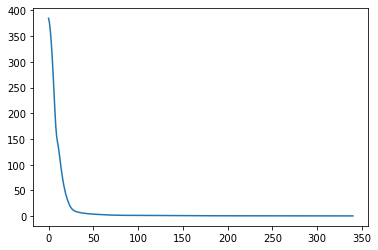

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

# Assuming x_train and y_train are your training data

# Split the data into training and validation sets (90% training, 10% validation)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Define custom loss function
def euclidean_distance_loss(y_true, y_pred):
    return np.sqrt(np.sum(np.square(y_pred - y_true), axis=-1))

# Define a custom scorer based on the custom loss function
def euclidean_distance_score(y_true, y_pred):
    return np.mean(euclidean_distance_loss(y_true, y_pred))

# Use make_scorer to create a scorer suitable for RandomizedSearchCV
scorer = make_scorer(euclidean_distance_score, greater_is_better=False)

# Create a multiple output regressor with MLPRegressor
# Set hidden_layer_sizes to specify the number of units in each hidden layer
# The last element in the tuple is the number of units in the final linear layer
base_regressor = MLPRegressor(hidden_layer_sizes=(50, 50, 3), alpha=0.001, learning_rate_init=0.001, max_iter=500, momentum=0.2, activation="tanh", random_state=42, validation_fraction=0.1)

# Set up the parameter distribution for RandomizedSearchCV
param_dist = {
    'hidden_layer_sizes': [(30, 3), (50, 3), (20, 3)],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'momentum': [0.5, 0.9, 0.02],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(base_regressor, param_distributions=param_dist, scoring=scorer, cv=5, n_iter=50, verbose=1, random_state=42)

# Fit the model
random_search.fit(x_train, y_train)

# Get the best parameters and best estimator
best_params = random_search.best_params_
best_regressor = random_search.best_estimator_

# Train the best regressor and obtain the training history
history = best_regressor.fit(x_train, y_train).loss_curve_

# Plot the training and validation loss over epochs
plt.figure()
plt.plot(history, label='Training Loss')
plt.plot(best_regressor.validation_scores_, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


In [ ]:
best_score

-2.357919856395873

In [ ]:
best_params

{'momentum': 0.5,
 'learning_rate_init': 0.01,
 'hidden_layer_sizes': (30, 3),
 'alpha': 0.01,
 'activation': 'relu'}

In [ ]:
best_regressor

MLPRegressor(alpha=0.01, hidden_layer_sizes=(30, 3), learning_rate_init=0.01,
             max_iter=500, momentum=0.5)

NameError: name 'x_validation' is not defined